# **Numpy**


In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

In [ ]:
# Load the breast cancer dataset
data = load_breast_cancer()

# Convert features and target to DataFrames
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Split the dataset into features (X) and target (y)
X, y = data.data, data.target

# Display the first few rows of the dataset
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
class LogisticRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.loss = []

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _loss(self, y, y_predicted):
        # Adding a small epsilon to avoid log(0)
        epsilon = 1e-9
        y_predicted = np.clip(y_predicted, epsilon, 1 - epsilon)
        return -np.mean(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            # Gradient descent
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Calculate loss and store it
            loss = self._loss(y, y_predicted)
            self.loss.append(loss)
            if i % 100 == 0:
                print(f"Epoch {i} Loss {loss}")

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def accuracy(y_pred, y_test):
      return np.sum(y_pred == y_test) / len(y_test)

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state=42)

In [ ]:
model = LogisticRegression(lr = 0.01, epochs = 1000)

model.fit(X_train, y_train)

Epoch 0 Loss 0.6931471805599453
Epoch 100 Loss 0.25221042220775614
Epoch 200 Loss 0.18965606557682496
Epoch 300 Loss 0.1614729749401884
Epoch 400 Loss 0.14481273814814144
Epoch 500 Loss 0.13356127969521775
Epoch 600 Loss 0.12532775366859378
Epoch 700 Loss 0.11897200270182058
Epoch 800 Loss 0.1138758686577007
Epoch 900 Loss 0.10967237603432338


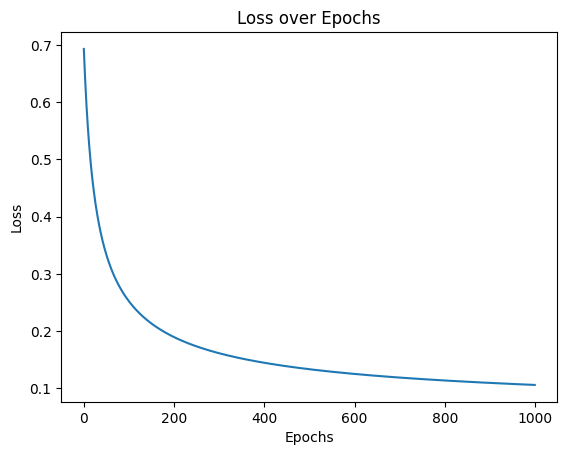

In [ ]:
import matplotlib.pyplot as plt

# Plot loss vs. epochs
plt.plot(range(len(model.loss)), model.loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.show()

In [ ]:
y_pred = model.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9912280701754386


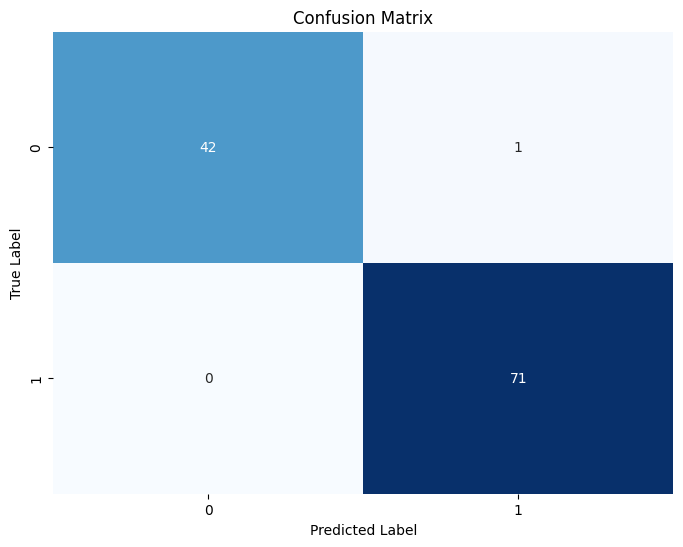

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# **Pytorch**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
import torch
import torch.nn as nn

class LogisticRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.loss = []
        self.sigmoid = nn.Sigmoid()
        self.epsilon = 1e-9

    def _loss(self, y, y_predicted):
        # Binary cross-entropy loss calculation with epsilon to prevent log(0)
        y_predicted = torch.clamp(y_predicted, self.epsilon, 1 - self.epsilon)
        return -torch.mean(y * torch.log(y_predicted) + (1 - y) * torch.log(1 - y_predicted))

    def fit(self, X, y):
        # Convert X and y to torch tensors if they aren't already
        if not isinstance(X, torch.Tensor):
            X = torch.tensor(X, dtype=torch.float32)
        if not isinstance(y, torch.Tensor):
            y = torch.tensor(y, dtype=torch.float32)

        n_samples, n_features = X.shape
        self.weights = torch.zeros(n_features, requires_grad=True, dtype=torch.float32)
        self.bias = torch.zeros(1, requires_grad=True, dtype=torch.float32)

        # Define the optimizer for gradient descent
        optimizer = torch.optim.SGD([self.weights, self.bias], lr=self.lr)

        for i in range(self.epochs):
            # Linear model: X * weights + bias
            linear_model = torch.matmul(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute the loss
            loss = self._loss(y, y_predicted)
            self.loss.append(loss.item())

            # Backpropagation and optimization step
            optimizer.zero_grad()  # Clear gradients
            loss.backward()        # Backpropagate
            optimizer.step()       # Update weights and bias

            if i % 100 == 0:
                print(f"Epoch {i} Loss {loss.item()}")

    def predict(self, X):
        if not isinstance(X, torch.Tensor):
            X = torch.tensor(X, dtype=torch.float32)

        with torch.no_grad():  # No need to compute gradients for prediction
            linear_model = torch.matmul(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            y_predicted_cls = (y_predicted > 0.5).int()
        return y_predicted_cls

    @staticmethod
    def accuracy(y_pred, y_test):
        # Ensure y_pred and y_test are torch tensors
        if not isinstance(y_pred, torch.Tensor):
            y_pred = torch.tensor(y_pred, dtype=torch.int32)
        if not isinstance(y_test, torch.Tensor):
            y_test = torch.tensor(y_test, dtype=torch.int32)
        return (y_pred == y_test).float().mean().item()


In [ ]:
model = LogisticRegression(lr=0.01, epochs=2000)
model.fit(X_train_tensor, y_train_tensor)

Epoch 0 Loss 0.6931473016738892
Epoch 100 Loss 0.25221043825149536
Epoch 200 Loss 0.189656063914299
Epoch 300 Loss 0.16147297620773315
Epoch 400 Loss 0.14481274783611298
Epoch 500 Loss 0.13356128334999084
Epoch 600 Loss 0.12532776594161987
Epoch 700 Loss 0.11897202581167221
Epoch 800 Loss 0.11387588083744049
Epoch 900 Loss 0.10967237502336502
Epoch 1000 Loss 0.10612843185663223
Epoch 1100 Loss 0.10308799892663956
Epoch 1200 Loss 0.10044220834970474
Epoch 1300 Loss 0.09811249375343323
Epoch 1400 Loss 0.0960405096411705
Epoch 1500 Loss 0.09418195486068726
Epoch 1600 Loss 0.09250243753194809
Epoch 1700 Loss 0.09097481518983841
Epoch 1800 Loss 0.08957739919424057
Epoch 1900 Loss 0.08829254657030106


In [ ]:
y_pred = model.predict(X_test_tensor)
accuracy = model.accuracy(y_pred, y_test_tensor)
print("Accuracy:", accuracy)

Accuracy: 0.9912280440330505


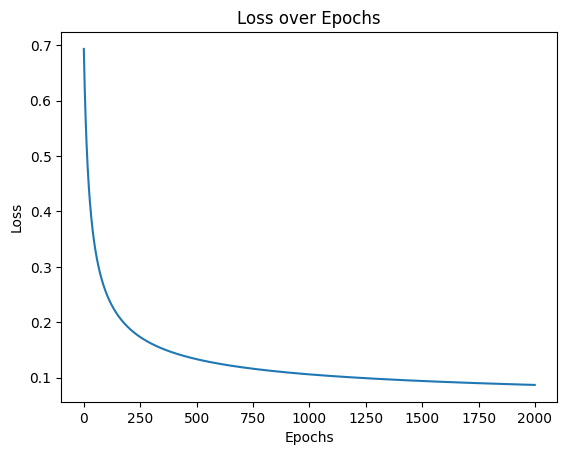

In [ ]:
plt.plot(range(len(model.loss)), model.loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.show()

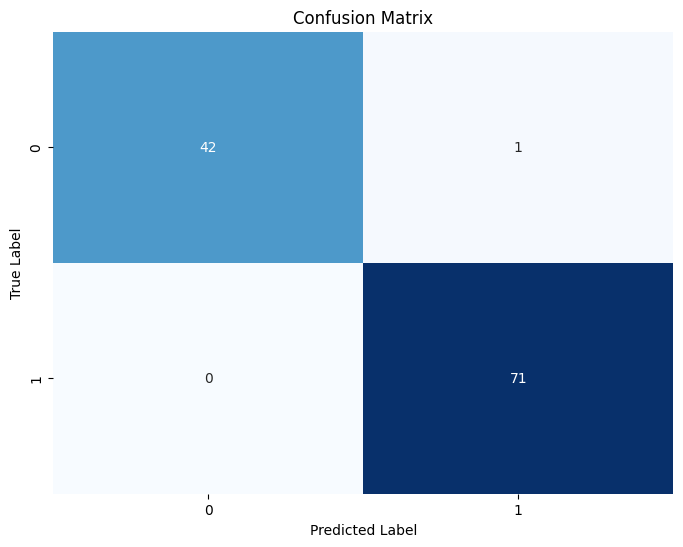

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# **Sklearn**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Epoch 0, Loss: 0.13361567738531113


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Epoch 100, Loss: 0.054652108410733334


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Epoch 200, Loss: 0.05293601403585627


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Epoch 300, Loss: 0.05256055514413352


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Epoch 400, Loss: 0.05193743362785901


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Epoch 500, Loss: 0.05201332575585065


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Epoch 600, Loss: 0.0517718003307582


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Epoch 700, Loss: 0.05254901841112412


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Epoch 800, Loss: 0.052249435202512434


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Epoch 900, Loss: 0.053147228015077014


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

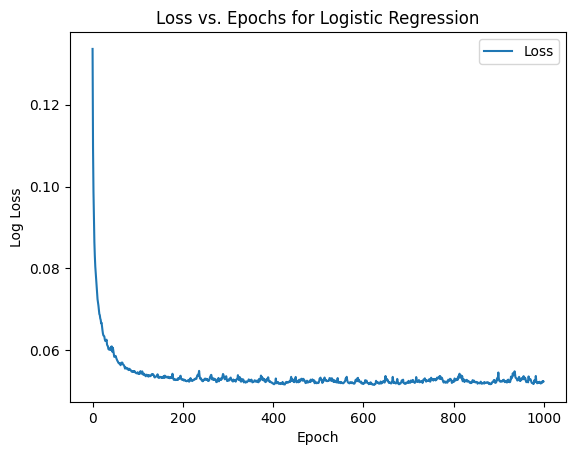

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss


# Initialize the model
model = LogisticRegression(solver='saga', max_iter=1, warm_start=True)  # 'warm_start' keeps the model's state

# Parameters
epochs = 1000
loss_per_epoch = []

# Training loop
for epoch in range(epochs):
    model.fit(X_train, y_train)  # Incremental fitting due to 'warm_start'
    y_pred_proba = model.predict_proba(X)  # Predicted probabilities
    loss = log_loss(y, y_pred_proba)  # Calculate log loss
    loss_per_epoch.append(loss)  # Store loss per epoch

    # Optional: Print every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Plotting the loss vs. epochs
plt.plot(range(epochs), loss_per_epoch, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Loss vs. Epochs for Logistic Regression')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9736842105263158


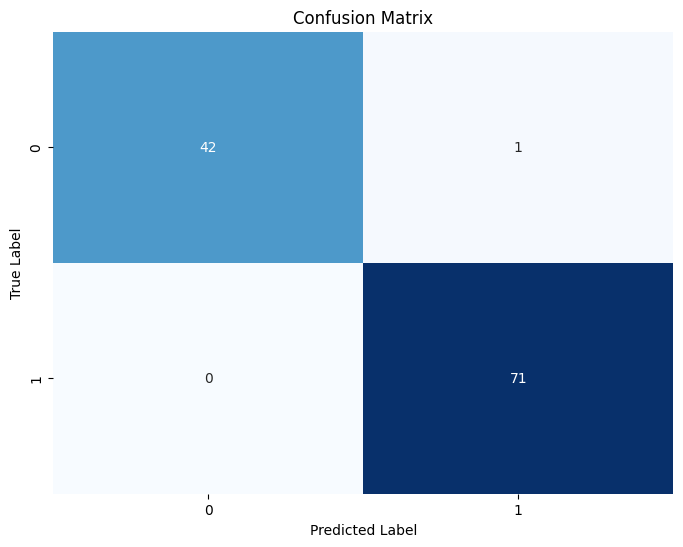

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()